In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

In [2]:
SEED_VALUE = 42

#Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print(f"\nTraining features: {X_train[0]}")
print(f"\nTarget variable: {y_train[0]}")

(404, 13)

Training features: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

Target variable: 15.2


In [4]:
#EXtract feature from the dataset for simplicuty.
boston_features = {
    "Average number of rooms":5,
}

X_train1d = X_train[:, boston_features["Average number of rooms"]]
print(X_train1d.shape)

X_test1d =X_test[:, boston_features["Average number of rooms"]]

(404,)


- plot the features.

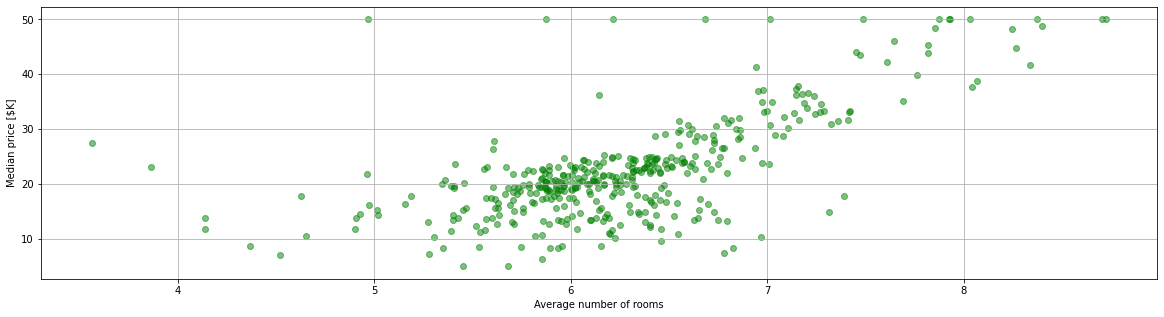

In [5]:
plt.figure(figsize=(20, 5))
plt.xlabel("Average number of rooms")
plt.ylabel("Median price [$K]")
plt.scatter(X_train1d[:], y_train, color='green', alpha=.5)
plt.grid()
plt.show()

- Define the model.

In [6]:
model = Sequential()

#Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

#Model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#Compile it.
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),
              loss='mse')

In [8]:
#Train
history = model.fit(X_train1d, y_train,
                    batch_size=16, epochs=101, validation_split=0.3)

Epoch 1/101
18/18 [==============================] - 1s 25ms/step - loss: 520.4456 - val_loss: 590.0081
Epoch 2/101
18/18 [==============================] - 0s 5ms/step - loss: 489.2036 - val_loss: 560.1870
Epoch 3/101
18/18 [==============================] - 0s 5ms/step - loss: 462.5702 - val_loss: 532.4729
Epoch 4/101
18/18 [==============================] - 0s 5ms/step - loss: 437.3352 - val_loss: 505.5344
Epoch 5/101
18/18 [==============================] - 0s 4ms/step - loss: 412.5795 - val_loss: 479.0071
Epoch 6/101
18/18 [==============================] - 0s 5ms/step - loss: 388.7006 - val_loss: 453.6983
Epoch 7/101
18/18 [==============================] - 0s 8ms/step - loss: 365.8325 - val_loss: 428.9762
Epoch 8/101
18/18 [==============================] - 0s 10ms/step - loss: 343.9071 - val_loss: 405.7415
Epoch 9/101
18/18 [==============================] - 0s 9ms/step - loss: 322.7757 - val_loss: 382.7855
Epoch 10/101
18/18 [==============================] - 0s 11ms/step - lo

In [9]:
def plot_history(history):
    plt.figure(figsize=(20, 5))
    plt.plot(history.history['loss'], 'g', label="Training loss")
    plt.plot(history.history['val_loss'], 'b', label="Validation loss")
    plt.xlabel("Number of epochs.")
    plt.ylabel("Loss")
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.grid()
    plt.legend()
    plt.show()

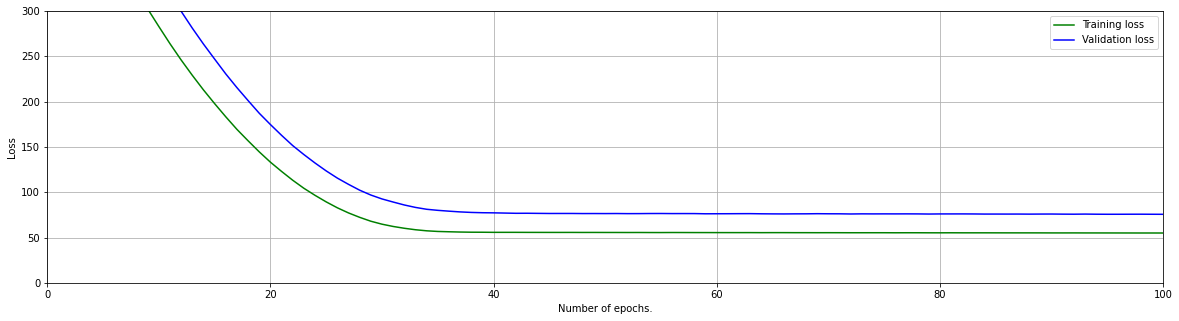

In [10]:
plot_history(history)

- Make predictions.

In [17]:
X = [2, 3, 4, 6, 7, 10]
predictions = model.predict(X)
for idx in range(len(X)):
    print("predicted price of a house with {} rooms is: ${}k".format(X[idx], int(predictions[idx] * 10) / 10))

1/1 [==============================] - 0s 57ms/step
predicted price of a house with 2 rooms is: $8.4k
predicted price of a house with 3 rooms is: $11.7k
predicted price of a house with 4 rooms is: $14.9k
predicted price of a house with 6 rooms is: $21.4k
predicted price of a house with 7 rooms is: $24.6k
predicted price of a house with 10 rooms is: $34.3k


<ipython-input-17-407a18b11dc9>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("predicted price of a house with {} rooms is: ${}k".format(X[idx], int(predictions[idx] * 10) / 10))


- Plot the model and the data.

In [20]:
#Create an independant variable
x = tf.linspace(2, 9, 10)

#Predict the dependent variable
y = model.predict(x)

1/1 [==============================] - 0s 87ms/step


In [28]:
def plot_model_outcomes(x_train, y_train, x, y, title=None):
    plt.figure(figsize=(20, 5))
    plt.scatter(x_train, y_train, color='r', alpha=0.5, label='Ground Truth')
    plt.plot(x, y, 'k', label='Model Predictions.')
    plt.xlabel('Average number of rooms')
    plt.ylabel('Price [$k]')
    plt.xlim([2, 9])
    plt.ylim([0, 60])
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

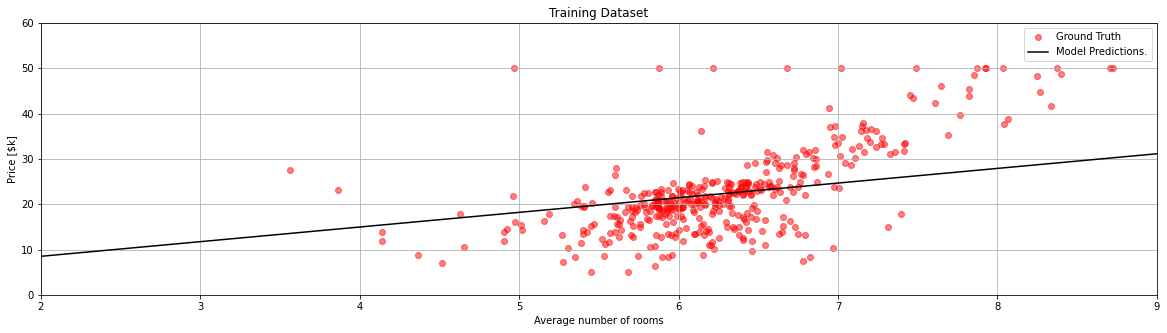

In [29]:
plot_model_outcomes(X_train1d, y_train, x, y, "Training Dataset")

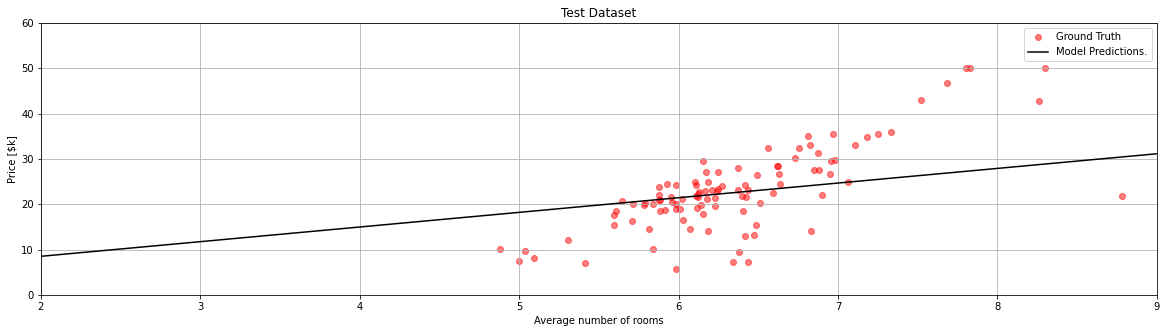

In [30]:
plot_model_outcomes(X_test1d, y_test, x, y, "Test Dataset")